<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyse-descriptive-avant-modélisation" data-toc-modified-id="Analyse-descriptive-avant-modélisation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Analyse descriptive avant modélisation</a></span><ul class="toc-item"><li><span><a href="#Import-des-packages,-lecture-des-tables-et-fonctions-réutilisées-dans-la-suite-du-notebook" data-toc-modified-id="Import-des-packages,-lecture-des-tables-et-fonctions-réutilisées-dans-la-suite-du-notebook-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Import des packages, lecture des tables et fonctions réutilisées dans la suite du notebook</a></span><ul class="toc-item"><li><span><a href="#Import-des-packages-et-lecture-des-tables" data-toc-modified-id="Import-des-packages-et-lecture-des-tables-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Import des packages et lecture des tables</a></span></li><li><span><a href="#Détection-des-valeurs-extrêmes" data-toc-modified-id="Détection-des-valeurs-extrêmes-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Détection des valeurs extrêmes</a></span></li><li><span><a href="#Correction-de-l'inflation" data-toc-modified-id="Correction-de-l'inflation-1.1.3"><span class="toc-item-num">1.1.3&nbsp;&nbsp;</span>Correction de l'inflation</a></span></li><li><span><a href="#Ajout-des-informations-sur-le-type-de-bien" data-toc-modified-id="Ajout-des-informations-sur-le-type-de-bien-1.1.4"><span class="toc-item-num">1.1.4&nbsp;&nbsp;</span>Ajout des informations sur le type de bien</a></span></li></ul></li><li><span><a href="#Analyse-des-valeurs-manquantes" data-toc-modified-id="Analyse-des-valeurs-manquantes-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Analyse des valeurs manquantes</a></span></li><li><span><a href="#Analyse-des-variables" data-toc-modified-id="Analyse-des-variables-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Analyse des variables</a></span><ul class="toc-item"><li><span><a href="#Analyse-de-la-variable-valeurfonc" data-toc-modified-id="Analyse-de-la-variable-valeurfonc-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Analyse de la variable <code>valeurfonc</code></a></span><ul class="toc-item"><li><span><a href="#Tentative-avec-un-autre-seuil-pour-détecter-les-valeurs-extrêmes-basé-sur-le-nombre-d'écart-types" data-toc-modified-id="Tentative-avec-un-autre-seuil-pour-détecter-les-valeurs-extrêmes-basé-sur-le-nombre-d'écart-types-1.3.1.1"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Tentative avec un autre seuil pour détecter les valeurs extrêmes basé sur le nombre d'écart types</a></span></li><li><span><a href="#Par-arrondissement" data-toc-modified-id="Par-arrondissement-1.3.1.2"><span class="toc-item-num">1.3.1.2&nbsp;&nbsp;</span>Par arrondissement</a></span></li></ul></li><li><span><a href="#Analyse-des-variables-issues-de-BPE" data-toc-modified-id="Analyse-des-variables-issues-de-BPE-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Analyse des variables issues de BPE</a></span><ul class="toc-item"><li><span><a href="#Analyse-rapide-sans-regroupement" data-toc-modified-id="Analyse-rapide-sans-regroupement-1.3.2.1"><span class="toc-item-num">1.3.2.1&nbsp;&nbsp;</span>Analyse rapide sans regroupement</a></span></li><li><span><a href="#Analyse-avec-regroupement" data-toc-modified-id="Analyse-avec-regroupement-1.3.2.2"><span class="toc-item-num">1.3.2.2&nbsp;&nbsp;</span>Analyse avec regroupement</a></span></li></ul></li><li><span><a href="#Analyse-des-variables-issues-de-Filosofi" data-toc-modified-id="Analyse-des-variables-issues-de-Filosofi-1.3.3"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Analyse des variables issues de Filosofi</a></span></li></ul></li></ul></li><li><span><a href="#Mise-en-forme-de-la-table" data-toc-modified-id="Mise-en-forme-de-la-table-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Mise en forme de la table</a></span><ul class="toc-item"><li><span><a href="#Sélection-des-variables" data-toc-modified-id="Sélection-des-variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Sélection des variables</a></span></li><li><span><a href="#Partition-training/validation/test-sets" data-toc-modified-id="Partition-training/validation/test-sets-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Partition training/validation/test sets</a></span></li></ul></li><li><span><a href="#Téléchargement-des-données" data-toc-modified-id="Téléchargement-des-données-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Téléchargement des données</a></span></li></ul></div>

# Analyse descriptive avant modélisation

Actuellement, nous disposons d'une table issue de la fusion de différences sources : DVF+open source, BPE, Filosofi. Cette table permet d'associer à chaque mutation (achat/vente d'appartements ou de maisons à Paris) des informations sur : 
- la distance aux équipements les plus proches
- des informations localisées sur les revenus, le tissu immobilier ...
- des informations sociodémographiques.

## Import des packages, lecture des tables et fonctions réutilisées dans la suite du notebook

### Import des packages et lecture des tables

In [48]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import numpy as np
import os

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [4]:
donnees = gpd.read_file("../good_data/filo_service/paris_mutation_filo_service.shp")

### Détection des valeurs extrêmes

Les valeurs adjacentes correspondent aux valeurs seuils à partir desquelles les points sont affichés les boxplots précédents. 

Ces valeurs sont définies de la manière suivantes : 
- VAS = $\max \{ x_i / x_i \leq Q_3 + 1.5(Q_3 - Q_1) \}$ (valeur adjacente supérieure)
- VAI = $\min \{ x_i / x_i \geq Q_1 - 1.5(Q_3 - Q_1) \}$ (valeur adjacente infénieure)

In [5]:
#Cette fonction renvoie pour une Series les valeurs adjacentes supérieures et inférieurs.
def va(serie):
    quant = serie.quantile([0.25, 0.75])
    interquant = quant.iloc[1] - quant.iloc[0]
    seuil_inf, seuil_sup = quant.iloc[0] - 1.5*interquant, quant.iloc[1] + 1.5*interquant
    vas = serie[serie <= seuil_sup].max()
    vai = serie[serie >= seuil_inf].min()
    return vai, vas

### Correction de l'inflation

In [6]:
def to_date_col(df, col= "datemut", formated= "%Y-%m-%d"):
    return pd.to_datetime(df[col], format= "%Y-%m-%d")

# paris_mutation["datemut"]= pd.to_datetime(paris_mutation["datemut"], format= "%Y-%m-%d")
donnees["datemut"]= to_date_col(donnees)

In [7]:
donnees["year"]= donnees["datemut"].apply(lambda x: x.year)

<AxesSubplot:xlabel='year', ylabel='valeurfonc'>

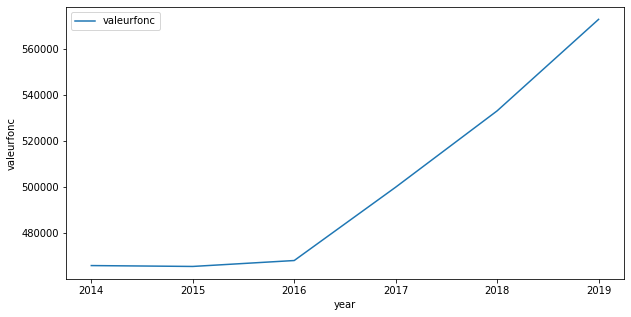

In [8]:
donnees1= donnees.copy()
donnees1= donnees1.groupby(["year"], as_index= False).mean()

fig = plt.subplots(1, 1, figsize= (10, 5))

sns.lineplot(data = donnees1, x = "year", y = "valeurfonc", label= "valeurfonc")

Nous allons faire l'approximation que la valeur foncière est linéaire par rapport à l'année de la mutation entre 2014 et 2016 ainsi qu'entre 2016 et 2019. Nous faisons également l'hypothèse que la variation de la valeur foncière par rapport à l'année est uniquement dû à l'inflation du prix de l'immobilier à Paris. Nous allons dans ce cadre réactualiser toutes les valeurs foncières à l'année 2016.

Nous récupérons d'un côté les mutations ayant eu lieu après 2016 et de l'autre celles ayant eu lieu avant 2016. 

In [9]:
donneesbefore2016 = donnees[donnees["year"]<=2016]
donneesbefore2016 = donneesbefore2016.dropna()
donneesafter2016 = donnees[donnees["year"]>=2016]
donneesafter2016 = donneesafter2016.dropna()

In [10]:
moyperyear = donnees1.groupby(["year"]).mean()

moyvalperyear = moyperyear['valeurfonc']

In [11]:
inflatafter2016 = (moyvalperyear[2019] - moyvalperyear[2016])/moyvalperyear[2016]
inflatbefore2016 = (moyvalperyear[2014] - moyvalperyear[2016])/moyvalperyear[2016]

In [12]:
def f(x) :
    if x["year"] in [2017, 2018, 2019] :
        return x["valeurfonc"] / (1 + inflatafter2016*(x["year"] - 2016)/3)
    else :
        return x["valeurfonc"] / (1 + inflatbefore2016*(2016 - x["year"])/2)

donnees["valfoncact2"] = donnees.apply(f, axis = 1)

### Ajout des informations sur le type de bien 

L'information sur le type de bien étant manquante : nous allons la récupérer directement dans la base DVF. Elle nous permettra de savoir si les valeurs extrêmes pour la variable `valeurfonc` peuvent être expliquées par cette dernière.

In [14]:
mutation = pd.read_csv("../good_data/r11/r11_mutation.csv")
#Attention ce fichier n'est pas versionné car il fait plusieurs méga .. mais il est disponible ici :
#https://cerema.app.box.com/v/dvfplus-opendata/folder/111271284130
donnees = donnees.merge(mutation[["idmutation","libtypbien"]], on = "idmutation", how = "left")

##### Proportions d'appartements et de maisons

In [15]:
donnees["libtypbien"].value_counts(normalize = True)

UN APPARTEMENT    0.995172
UNE MAISON        0.004828
Name: libtypbien, dtype: float64

In [16]:
donnees.groupby("libtypbien")["valeurfonc"].mean()

libtypbien
UN APPARTEMENT    4.932710e+05
UNE MAISON        2.143348e+06
Name: valeurfonc, dtype: float64

## Analyse des valeurs manquantes

Récupération des lignes contenant au moins une valeur manquante : 

In [17]:
donnees_na = donnees[donnees.isnull().any(axis = 1)]

Il s'agit à chaque fois de mutations dont on ne connaît pas la position exacte.

Ces mutations sont majoritairement présentes dans le 17ème et 18ème arrondissement.

In [18]:
donnees_na.l_codinsee.str[4:6].value_counts()

18    61
17    47
13    20
16    16
15    12
11     6
12     4
09     3
20     3
10     3
19     2
07     1
14     1
02     1
Name: l_codinsee, dtype: int64

Ces données sont inutilisables et correspondent à une part minime de notre jeu de données (environ 0.1%). Nous avons donc décidé de les supprimer.

In [19]:
donnees = donnees[~donnees.isnull().any(axis = 1)]

## Analyse des variables

### Analyse de la variable `valeurfonc`

In [20]:
vas = va(donnees["valeurfonc"])[1]

In [21]:
print(format("Il y a {}% des observations au dessus de la VAS {}".format(100*len(donnees[donnees["valeurfonc"] > vas])/len(donnees), vas)))
print(format("Il y a {}% des observations au dessus de 10M€".format(100*len(donnees[donnees["valeurfonc"] > 1e7])/len(donnees))))

Il y a 7.109893925647143% des observations au dessus de la VAS 1150000.0
Il y a 0.02408235043740269% des observations au dessus de 10M€


Les maisons représentent 0.5% de nos données. Pour autant, ils correspondent à 5% des biens de plus de 1,5M€ et à 40% des biens de plus de 10M€ ...

In [22]:
print(donnees[donnees["valeurfonc"] > 1e7]["libtypbien"].value_counts())
print(donnees[donnees["valeurfonc"] > vas]["libtypbien"].value_counts())

UN APPARTEMENT    25
UNE MAISON        18
Name: libtypbien, dtype: int64
UN APPARTEMENT    12202
UNE MAISON          493
Name: libtypbien, dtype: int64


<span class="mark">** Nous allons nous restreindre aux appartements ici **</span>

In [23]:
donnees = donnees[donnees.libtypbien == "UN APPARTEMENT"]

Recalcul de la valeur adjacente moyenne

In [24]:
vas = va(donnees["valeurfonc"])[1]
print(vas)

1137500.0


#### Tentative avec un autre seuil pour détecter les valeurs extrêmes basé sur le nombre d'écart types

Le graphique suivant présente le nombre d'observations en fonction du logarithme décimal de la valeur foncière : cela va nous permettre d'identifier d'éventuelles valeurs abérantes. On se restreint ici uniquement aux biens dont la valeur foncière est inférieur à 1M€. On voit que globalement il y a très peu de biens dont la valeur est inférieur à 70 000 €.

<AxesSubplot:>

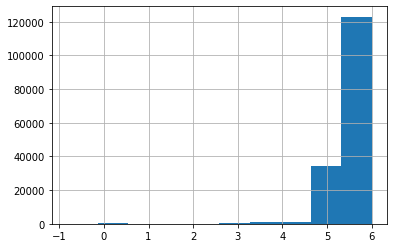

In [25]:
np.log10(donnees[(donnees["valeurfonc"] < 1e6) & (donnees["valeurfonc"] > 0)]["valeurfonc"]).hist()

'Il y a 1.3438833050074848 % des biens dont la valeur est inférieure à 10 000€'

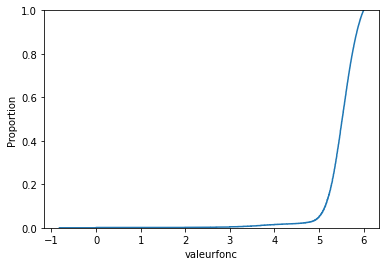

In [26]:
sns.ecdfplot(np.log10(donnees[(donnees["valeurfonc"] < 1e6) & (donnees["valeurfonc"] > 0)]["valeurfonc"]))
"Il y a {} % des biens dont la valeur est inférieure à 10 000€".format(100 * len(donnees[donnees["valeurfonc"] < 1e4])/len(donnees))

On note qu'il y a 1.3 % des biens dont la valeur est inférieure à 10 000€. Pour autant, ces biens présentent des superficies non négligeables. Nous avons donc décider de les exclure de la base.

#### Par arrondissement

<AxesSubplot:title={'center':'valeurfonc'}, xlabel='l_codinsee'>

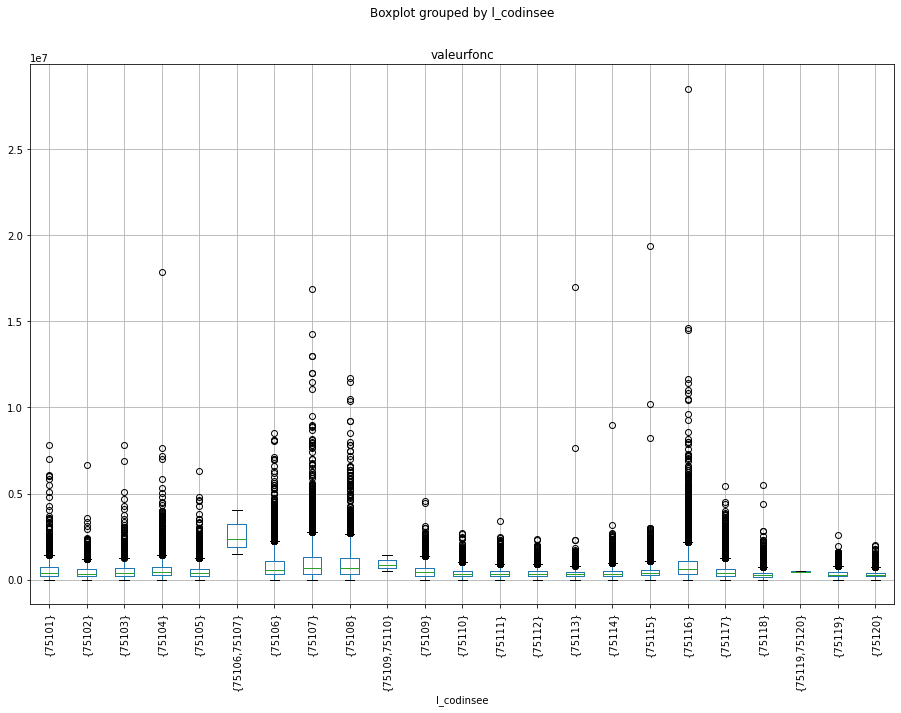

In [27]:
donnees.boxplot(column = "valeurfonc",by = "l_codinsee", figsize = (15,10), rot = 90)

On remarque que certains valeurs (30 M€) sont très au dessus des valeurs usuelles. On remarque également que le 16 et le 7ème arrondissement disposent d'un grand nombre de valeurs très grande --> La variable arrondissement captera peut être cette caractéristique.

<span class="mark">Suggestion : **Ne garder que les biens dont la valeur foncière est inférieure ou égale à 10M€**</span>

### Analyse des variables issues de BPE

#### Analyse rapide sans regroupement

On remarque que les hypermarchés, les musées et les poisonneries sont en moyenne plus éloignés des autres services. On remarque que pour chaque type de services, il existe des biens très éloignés d'eux (allant jusqu'à 3 km pour les hypermarchés). On peut se demander s'il existe des biens distants de tous les services simultanément et si cette information a une influence sur le prix du bien.

<AxesSubplot:>

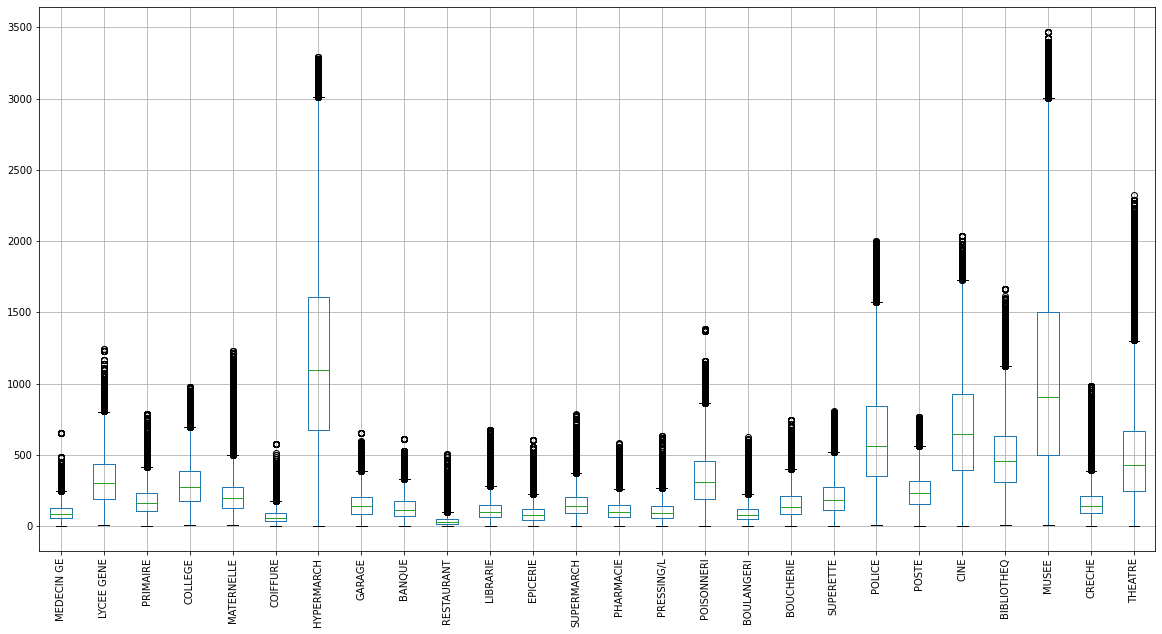

In [28]:
donnees.loc[:,"MEDECIN GE":"THEATRE"].boxplot(figsize = (20,10),rot = 90)

array([[<AxesSubplot:title={'center':'MEDECIN GE'}>,
        <AxesSubplot:title={'center':'LYCEE GENE'}>,
        <AxesSubplot:title={'center':'PRIMAIRE'}>,
        <AxesSubplot:title={'center':'COLLEGE'}>,
        <AxesSubplot:title={'center':'MATERNELLE'}>],
       [<AxesSubplot:title={'center':'COIFFURE'}>,
        <AxesSubplot:title={'center':'HYPERMARCH'}>,
        <AxesSubplot:title={'center':'GARAGE'}>,
        <AxesSubplot:title={'center':'BANQUE'}>,
        <AxesSubplot:title={'center':'RESTAURANT'}>],
       [<AxesSubplot:title={'center':'LIBRARIE'}>,
        <AxesSubplot:title={'center':'EPICERIE'}>,
        <AxesSubplot:title={'center':'SUPERMARCH'}>,
        <AxesSubplot:title={'center':'PHARMACIE'}>,
        <AxesSubplot:title={'center':'PRESSING/L'}>],
       [<AxesSubplot:title={'center':'POISONNERI'}>,
        <AxesSubplot:title={'center':'BOULANGERI'}>,
        <AxesSubplot:title={'center':'BOUCHERIE'}>,
        <AxesSubplot:title={'center':'SUPERETTE'}>,
        <Axe

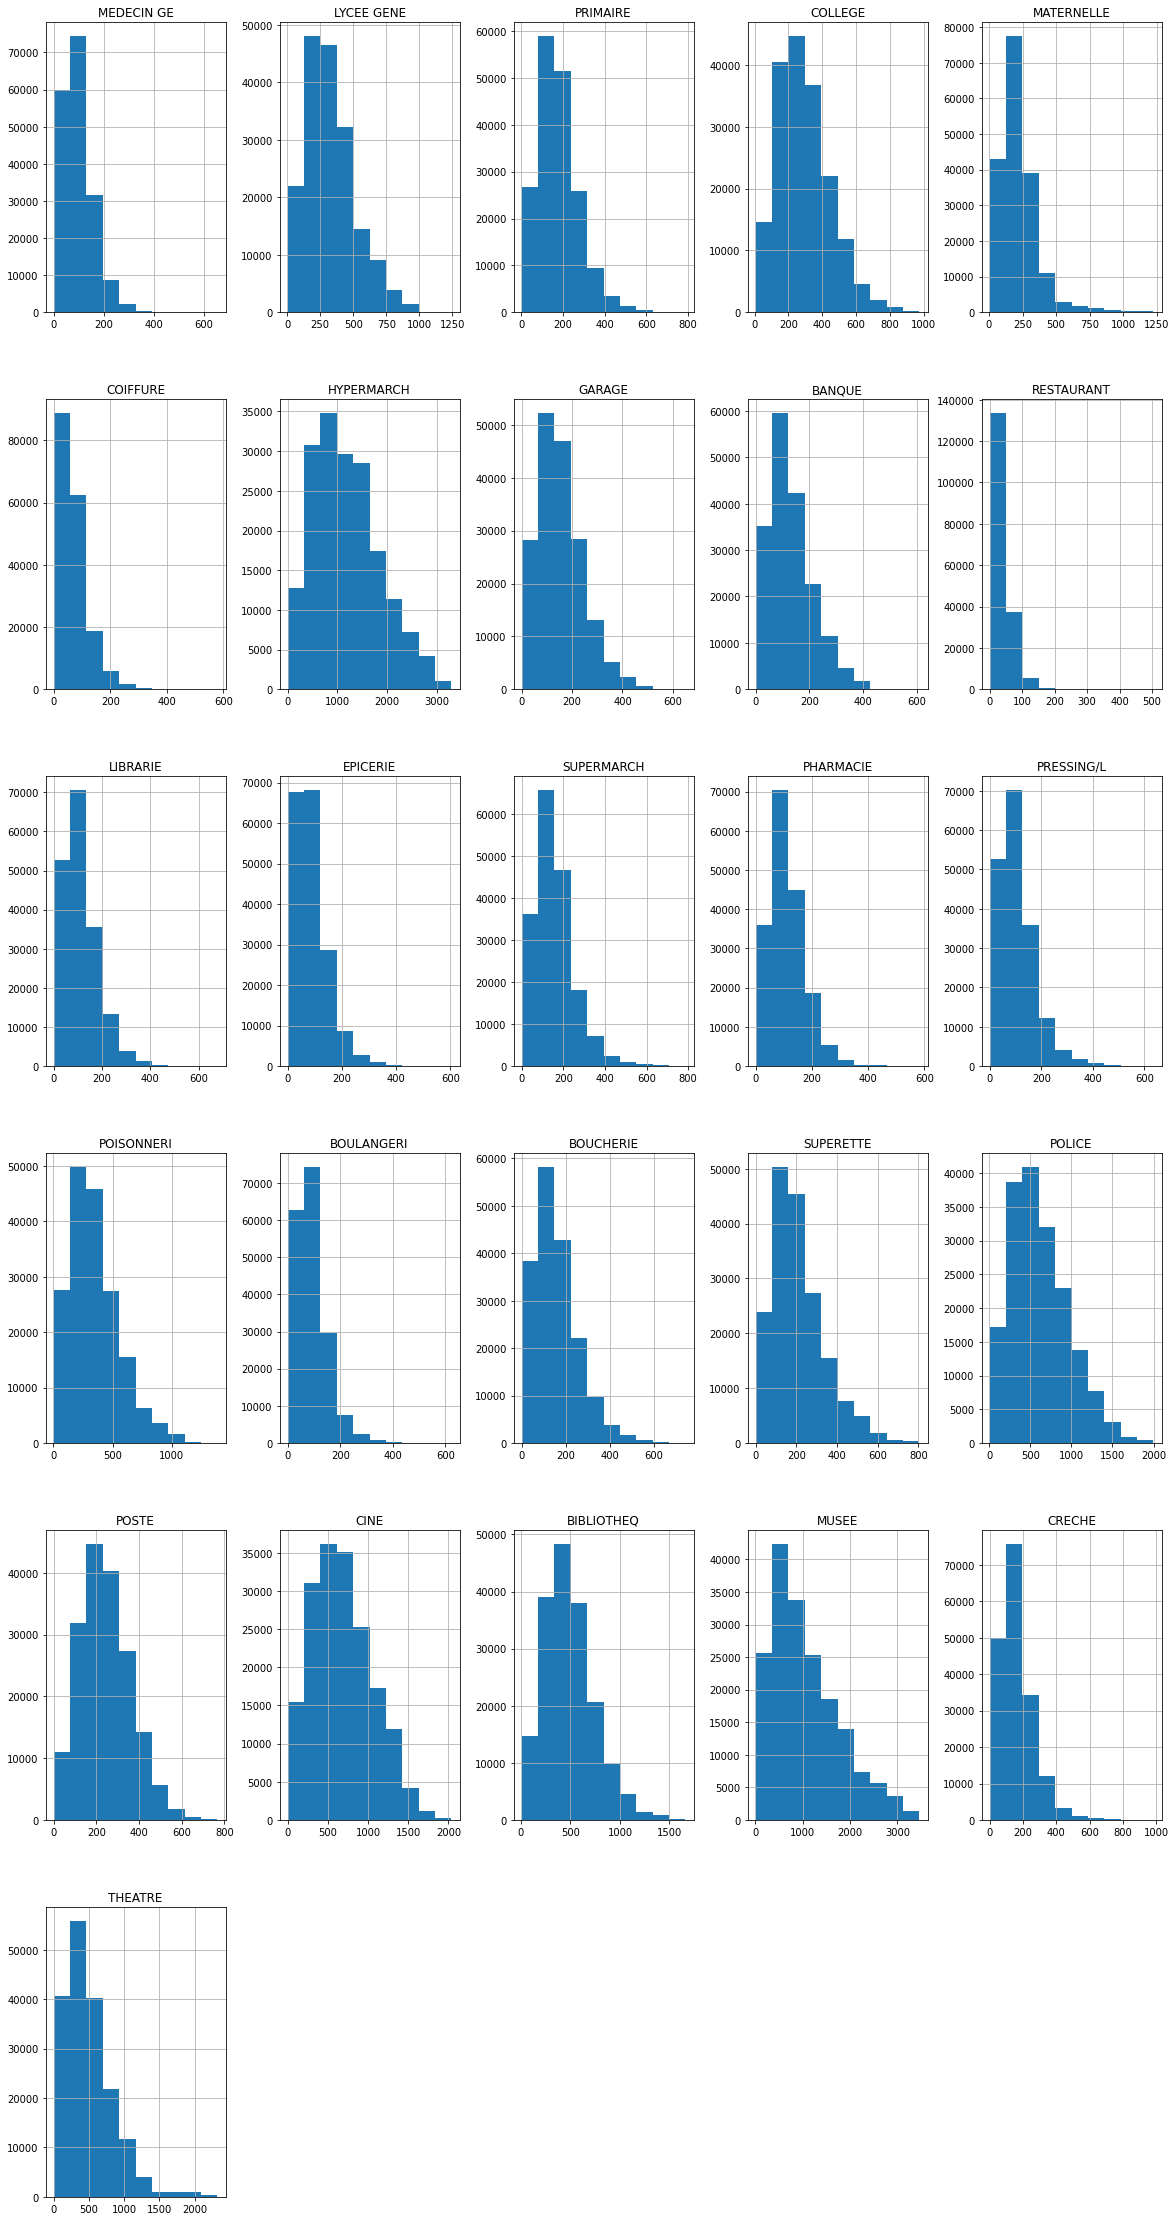

In [29]:
donnees.loc[:,"MEDECIN GE":"THEATRE"].hist(figsize = (20,40))

#### Analyse avec regroupement

Des regroupements de variables sont nécessaires dans le cadre de notre modélisation : 
- **COMMERCE** : Hypermarché (qui présente la plus forte hétérogénéité avec musée), épicerie, supermarché, supérette
- **CULTURE** : Théâtre, musée, bibliothèque, ciné, librarie
- **ENS_SEC** : Lycée général et collège
- **ENS_PRI** : Maternelle et primaire
- **CRECHE** : Crèche
- **MEDECIN** : Médecin généraliste
- **PHARMARCIE** : Pharmarcie
- **AUTRES_SERV**Coiffure, garage, banque, restaurant, Pressing, poste
- **AUTRES_ALIM** Boulangerie, boucherie, poisonnerie
- Police ? à retirer ?

Il suffit de prendre les mininums pour obtenir la distance au plus proche d'une catégorie.

In [30]:
donnees_bpe = pd.concat([donnees[["idmutation"]],donnees.loc[:,"MEDECIN GE":"THEATRE"]], axis = 1)

In [31]:
nouveau_regroupe = pd.DataFrame({"variable" : ['MEDECIN GE', 'LYCEE GENE', 'PRIMAIRE', 'COLLEGE',
       'MATERNELLE', 'COIFFURE', 'HYPERMARCH', 'GARAGE', 'BANQUE',
       'RESTAURANT', 'LIBRARIE', 'EPICERIE', 'SUPERMARCH', 'PHARMACIE',
       'PRESSING/L', 'POISONNERI', 'BOULANGERI', 'BOUCHERIE', 'SUPERETTE',
       'POLICE', 'POSTE', 'CINE', 'BIBLIOTHEQ', 'MUSEE', 'CRECHE', 'THEATRE'], 
             "regroup" : ['MEDECIN', 'ENS_SEC', 'ENS_PRI', 'ENS_SEC',
       'ENS_PRI', 'AUTRES_SERV', 'COMMERCE', 'AUTRES_SERV', 'AUTRES_SERV',
       'AUTRES_SERV', 'CULTURE', 'COMMERCE', 'COMMERCE', 'PHARMACIE',
       'AUTRES_SERV', 'AUTRES_ALIM', 'AUTRES_ALIM', 'AUTRES_ALIM', 'COMMERCE',
       'POLICE', 'AUTRES_SERV', 'CULTURE', 'CULTURE', 'CULTURE', 'CRECHE', 'CULTURE']})

In [32]:
dist_nouveau_regroupe = donnees_bpe.melt(id_vars = ["idmutation"]).merge(nouveau_regroupe, on = "variable", how = "left").groupby(["idmutation","regroup"])["value"].min()

donnees_bpe_nouveau_regroupe = dist_nouveau_regroupe.to_frame().reset_index(level = [0,1]).pivot(columns = "regroup", values = "value", index = "idmutation")
#Pour retirer le multiIndex en sortie du groupby on met un reset_index(level = [0,1])

<AxesSubplot:>

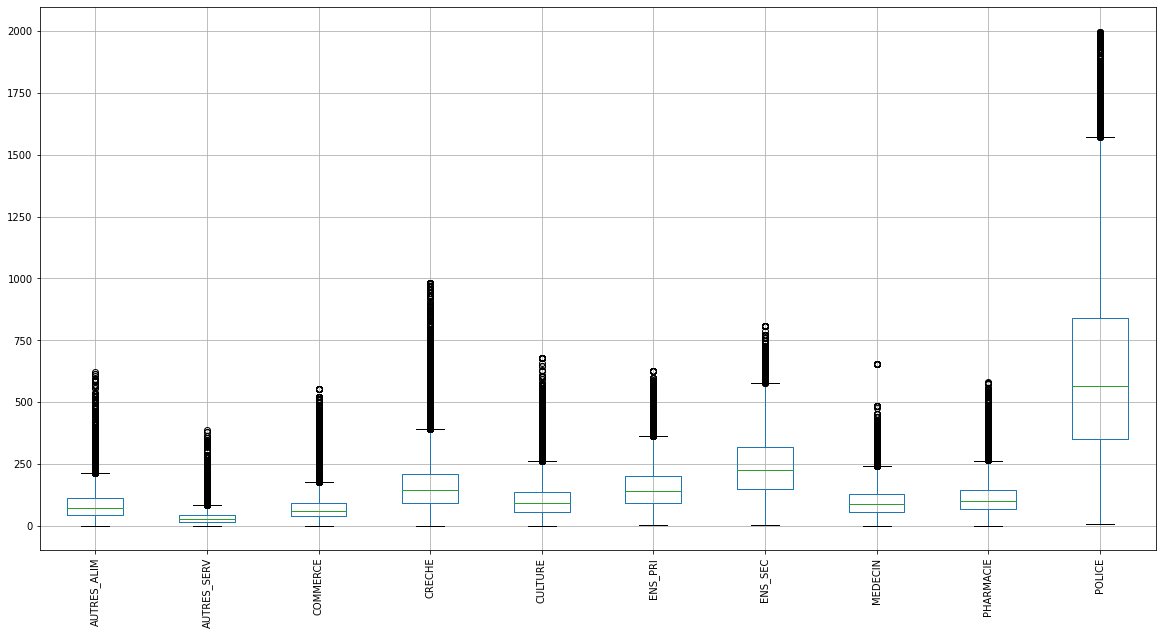

In [33]:
donnees_bpe_nouveau_regroupe.boxplot(figsize = (20,10),rot = 90)

In [34]:
va_bpe = donnees_bpe_nouveau_regroupe.apply(va)

val_ext_bpe = donnees_bpe_nouveau_regroupe.le(va_bpe.iloc[0,:], axis = 1) | donnees_bpe_nouveau_regroupe.ge(va_bpe.iloc[1,:], axis = 1)
nb_val_ext = val_ext_bpe.sum(axis = 1)

<AxesSubplot:>

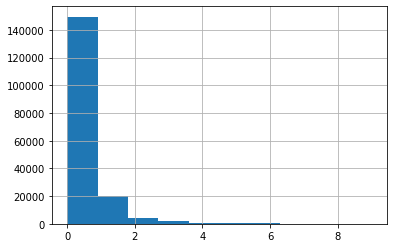

In [35]:
nb_val_ext.hist()

Elimination des mutations dont au moins 5 des 10 distances aux services sont extrêmes (0.5% du dataset)? 

In [36]:
100*nb_val_ext.value_counts(normalize = True)

0    84.121580
1    11.458462
2     2.480106
3     1.048994
4     0.375364
6     0.204284
5     0.185150
7     0.082726
9     0.027013
8     0.016320
dtype: float64

La valeur foncière médiane en fonction du nombre de distances aux services extrêmes : on remarque que la valeur est stable jusqu'à 8. À 8, on observe une baisse : cela apparaît cohérent --> bien éloigné de tout / moins valorisé.

Par contre, la valeur foncière médiane pour un bien éloigné de manière extrème à plus de 9 services (sur 10) est très supérieure aux autres valeurs médianes observées. Ceci semble contreintuitif.

<AxesSubplot:xlabel='nb_val_ext'>

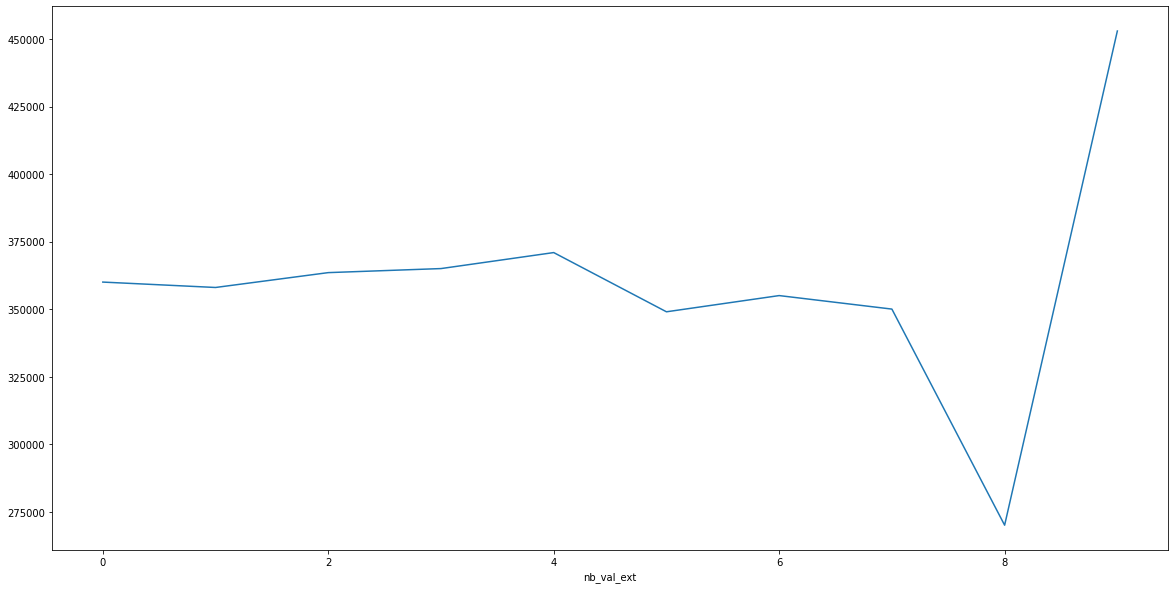

In [37]:
(nb_val_ext.to_frame("nb_val_ext").reset_index()).merge(donnees[["idmutation","valeurfonc"]], on = "idmutation", how = "left").groupby("nb_val_ext")["valeurfonc"].median().plot(figsize = (20,10))

### Analyse des variables issues de Filosofi

<AxesSubplot:xlabel='nb_val_ext'>

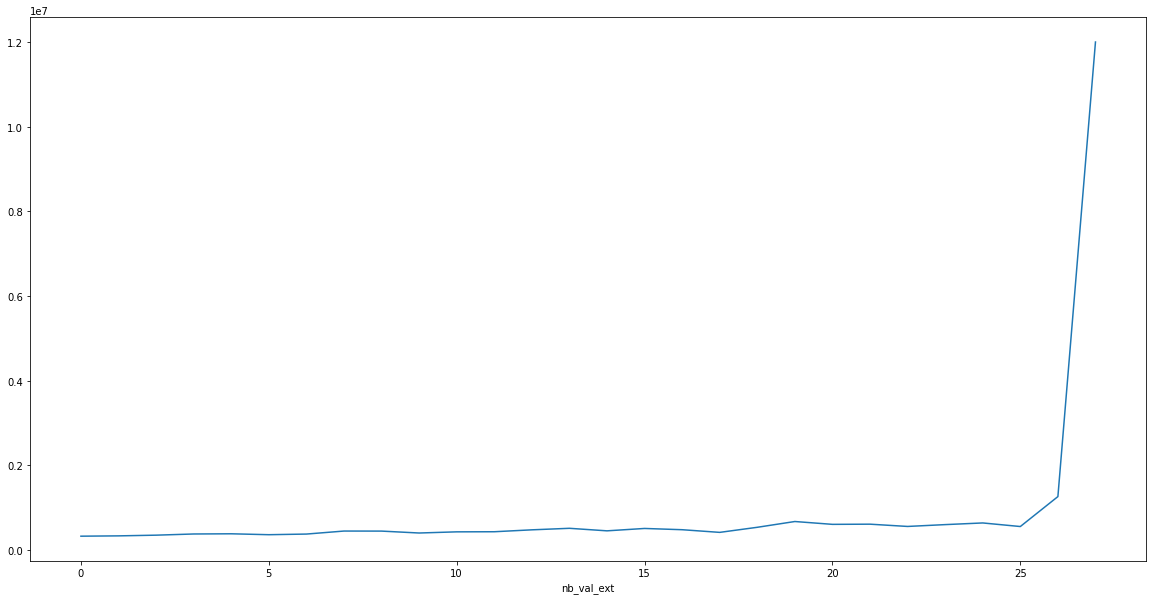

In [38]:
#Restriction aux données issues de Filosofi
donnees_filosofi = pd.DataFrame(donnees.loc[:,"Ind":"ind_par__1"])

#Calcul des valeurs adjacentes pour les données issues de Filosofi
va_filosofi = donnees_filosofi.apply(va)

#Détermination pour chaque ind x variable si la valeur est extrême ou non
val_ext_filosofi = donnees_filosofi.le(va_filosofi.iloc[0,:], axis = 1) | donnees_filosofi.ge(va_filosofi.iloc[1,:], axis = 1)

#Décompte du nombre de variables dont la valeur est extrême par individu
nb_val_ext_filosi = val_ext_filosofi.sum(axis = 1)

#Courbe valeur foncière médiane en fonction du nombre de variables à valeurs extrêmes
nb_val_ext_filosi.to_frame("nb_val_ext").set_index(donnees["idmutation"]).reset_index().merge(donnees[["idmutation","valeurfonc"]], on = "idmutation", how = "left").groupby("nb_val_ext")["valeurfonc"].median().plot(figsize = (20,10))

On remarque que les mutations ayant plus de 27 variables dont la valeur est extrême sur 31 variables issues de Filosofi ont des valeurs foncières très élevées.

# Mise en forme de la table

La table est constitués de colonnes qui ne serviront pas forcément lors de la construction du modèle (des tables temporaires par exemple). De plus, nous allons effectuer dans cette partie la partition *training, validation and test set* (on part sur un découpage 60-20-20).

## Sélection des variables

In [39]:
donnees["arrondissement"] = donnees["l_codinsee"].str[4:6]

Actuellement les variables disponibles sont les suivantes :

|   Variable   |                             Action                            |
|:------------:|:-------------------------------------------------------------:|
| 'idmutation' |                          Identifiant                          |
|   'datemut'  |                      Date de la mutation                      |
| 'valeurfonc' |                        Valeur foncière                        |
|    'nblot'   |                   Nombre de lots ayant muté                   |
| 'l_codinsee' |            Remplacer par une colonne Arrondissement           |
|    'nbpar'   |                Nombre de parcelles ayant mutée                |
|  'nblocmut'  |                  Nombre de locaux ayant muté                  |
|  'nblocdep'  |                Nombre de dépendances ayant muté               |
|    'sbati'   |                 Surface de l'ensemble du bâti                 |
|     'pp'     |                        Nombre de pièces                       |
| 'sbati_squa' |             Surface de l'ensemble du bâti au carré            |
| 'valeurfo_1' |                    Tentative : à supprimer                    |
|     'irl'    |                          Indice Insee                         |
| 'rate_cumpr' |                    Tentative : à supprimer                    |
| 'valeurfo_2' |                    Tentative : à supprimer                    |
| 'valeurfo_3' |                    Tentative : à supprimer                    |
|     'FR'     |                    Tentative : à supprimer                    |
|  'IdINSPIRE' |                    Id Inspire : à supprimer                   |
|     'Ind'    |           Nombre d'individus dans le carreau (non %)          |
|     'Men'    |           Nombre de ménages dans le carreau (non %)           |
|  'Men_pauv'  |                   Nombre de ménages pauvres                   |
|  'Men_1ind'  |                Nombre de ménages d'un individu                |
|  'Men_5ind'  |           Nombre de ménages de 5 individus ou plus            |
|  'Men_prop'  |                Nombre de ménages propriétaires                |
|   'Men_fmp'  |                Nombre de ménages monoparentaux                |
|   'Ind_snv'  |   Somme des niveaux de vie winsorisés des individus (non %)   |
|  'Men_surf'  |      Somme de la surface des logements du carreau (non %)     |
|  'Men_coll'  |           Nombre de ménages en logements collectifs           |
|  'Men_mais'  |                  Nombre de ménages en maison                  |
|  'Log_av45'  |           Nombre de logements construits avant 1945           |
|  'Log_45_70' |       Nombre de logements construits entre 1945 et 1969       |
|  'Log_70_90' |       Nombre de logements construits entre 1970 et 1989       |
|  'Log_ap90'  |           Nombre de logements construits depuis 1990          |
|   'Log_inc'  | Nombre de logements dont la date de construction est inconnue |
|   'Log_soc'  |                  Nombre de logements sociaux                  |
|   'Ind_0_3'  |                Nombre d’individus de 0 à 3 ans                |
|   'Ind_4_5'  |                Nombre d’individus de 4 à 5 ans                |
|  'Ind_6_10'  |                Nombre d’individus de 6 à 10 ans               |
|  'Ind_11_17' |               Nombre d’individus de 11 à 17 ans               |
|  'Ind_18_24' |               Nombre d’individus de 18 à 24 ans               |
|  'Ind_25_39' |               Nombre d’individus de 25 à 39 ans               |
|  'Ind_40_54' |               Nombre d’individus de 40 à 54 ans               |
|  'Ind_55_64' |               Nombre d’individus de 55 à 64 ans               |
|  'Ind_65_79' |               Nombre d’individus de 65 à 79 ans               |
|   'Ind_80p'  |              Nombre d’individus de 80 ans ou plus             |
|   'Ind_inc'  |           Nombre d’individus dont l’âge est inconnu           |
| 'ind_par_zo' |         Surface moyenne des logements dans le carreau         |
| 'nv_par_hab' |          Niveau de vie moyen des habitants du carreau         |
| 'ind_par__1' |                                                               |
| 'MEDECIN GE' |                                                               |
| 'LYCEE GENE' |                                                               |
|  'PRIMAIRE'  |                                                               |
|   'COLLEGE'  |                                                               |
| 'MATERNELLE' |                                                               |
|  'COIFFURE'  |                                                               |
| 'HYPERMARCH' |                                                               |
|   'GARAGE'   |                                                               |
|   'BANQUE'   |                                                               |
| 'RESTAURANT' |                                                               |
|  'LIBRARIE'  |                                                               |
|  'EPICERIE'  |                                                               |
| 'SUPERMARCH' |                                                               |
|  'PHARMACIE' |                                                               |
| 'PRESSING/L' |                                                               |
| 'POISONNERI' |                                                               |
| 'BOULANGERI' |                                                               |
|  'BOUCHERIE' |                                                               |
|  'SUPERETTE' |                                                               |
|   'POLICE'   |                                                               |
|    'POSTE'   |                                                               |
|    'CINE'    |                                                               |
| 'BIBLIOTHEQ' |                                                               |
|    'MUSEE'   |                                                               |
|   'CRECHE'   |                                                               |
|   'THEATRE'  |                                                               |
|  'geometry'  |                                                               |
|    'year'    |                                                               |
| 'valfoncact' |               Il s'agit de la variable à prédire              |
| 'libtypbien' |    On ne garde que les appartements donc on peut l'enlever    |

In [40]:
donnees.drop(["valeurfo_1", "irl", "rate_cumpr", "valeurfo_2","valeurfo_3","FR","IdINSPIRE","libtypbien","l_codinsee","geometry","year", "valeurfonc"], axis = 1, inplace = True)

In [41]:
indice_col_a_enlever = range(donnees.columns.get_loc("MEDECIN GE"),donnees.columns.get_loc("THEATRE"))

In [42]:
donnees = donnees.drop(columns = donnees.columns[indice_col_a_enlever], axis = 1)

In [43]:
donnees = donnees.merge(donnees_bpe_nouveau_regroupe, on = "idmutation", how = "left")

## Partition training/validation/test sets

Les données sont découpées en trois tables : 
- un training set (60%) des observations permettant l'apprentissage des algorithmes.
- un validation set (20%) des observations permettant de choisir les hyperparamètres du modèle.
- un test set (20%) des observations permettant d'obtenir une estimation de la fonction de risque.

In [44]:
donnees_train, donnees_test = train_test_split(donnees, test_size=0.2, random_state = 18112020)

donnees_train, donnees_validation = train_test_split(donnees_train, test_size = 0.25, random_state = 18112020)

Création d'un dossier pour enregistrer les fichiers

In [45]:
newpath = r'../../good_data/data/donnees_model' 
if not os.path.exists(newpath):
    os.makedirs(newpath)

Enregistrement des fichiers

In [46]:
pd.DataFrame(donnees_train).to_csv("../../good_data/data/donnees_model/donnees_train.csv")

pd.DataFrame(donnees_validation).to_csv("../../good_data/data/donnees_model/donnees_validation.csv")

pd.DataFrame(donnees_test).to_csv("../../good_data/data/donnees_model/donnees_test.csv")

# Téléchargement des données

Les données ainsi qu'un dictionnaire des variables sont disponibles [ici](https://drive.google.com/drive/folders/1j3FzhP5jVh06GkGhSa4PkkwLZdeveYJB?usp=sharing).